In [2]:
import pygrib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
def extract_data(filename):
    with pygrib.open(filename) as grbs:
        grb = grbs.select()[0]
        data = grb.values
        return data.flatten()

In [4]:
X = extract_data('twelve-hour')
y = extract_data('zero-hour')

In [5]:
# Reshape X to meet sklearn requirements
X = X.reshape(-1, 1)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create a linear regression object
regr = LinearRegression()

In [8]:
# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [9]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [10]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [1.00059261]


In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_geopotential_height(data, lats, lons):
    # Create a map plot using Cartopy
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the geopotential height data
    plt.contourf(lons, lats, data, cmap='coolwarm')

    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label('Geopotential Height (gpm)')

    # Set plot title and labels
    plt.title('Predicted Geopotential Height at 500 hPa')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()




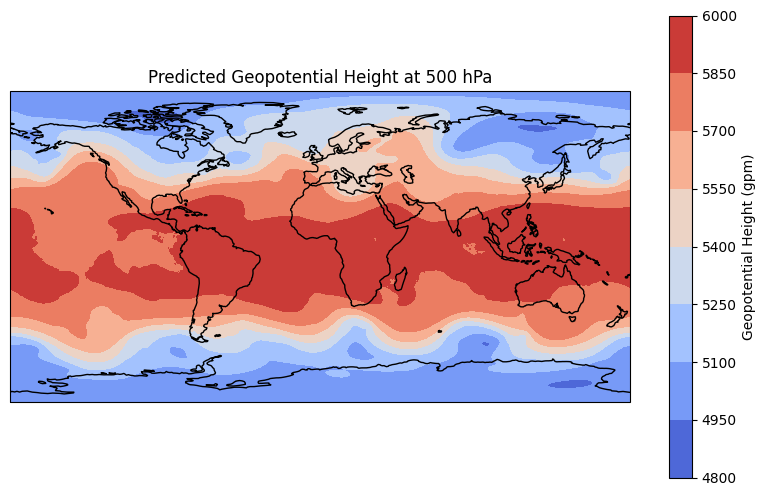

In [12]:
import pandas as pd
import numpy as np

# Function to get data and lat/lon from new GRIB file
def extract_data_and_coords(filename):
    with pygrib.open(filename) as grbs:
        grb = grbs.select()[0]
        data = grb.values
        lats, lons = grb.latlons()
        return data.flatten(), lats, lons

# Extract data and coordinates from new GRIB file
X_new, lats, lons = extract_data_and_coords('new-twelve')

# Reshape X_new to meet sklearn requirements
X_new = X_new.reshape(-1, 1)

# Make predictions using the new data
y_new_pred = regr.predict(X_new)

# Save predictions to a CSV file
pd.DataFrame(y_new_pred).to_csv('predictions.csv', index=False)

# Reshape predicted data back to original dimensions for plotting
y_new_pred = y_new_pred.reshape(361, 720)

# Plot the predicted geopotential height
plot_geopotential_height(y_new_pred, lats, lons)


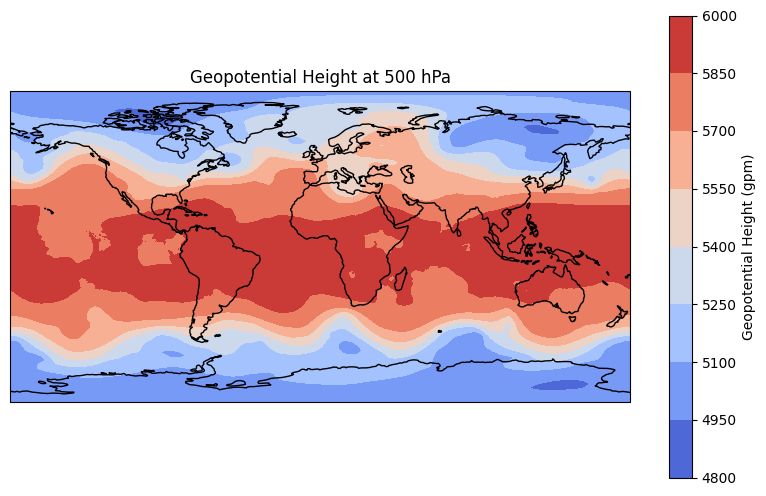

In [13]:
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_geopotential_height(file_path):
    grbs = pygrib.open(file_path)
    grb = grbs.select(name='Geopotential Height')[0]  # Assuming Geopotential Height is the variable of interest

    data = grb.values
    lats, lons = grb.latlons()

    # Create a map plot using Cartopy
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the geopotential height data
    plt.contourf(lons, lats, data, cmap='coolwarm')

    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label('Geopotential Height (gpm)')

    # Set plot title and labels
    plt.title('Geopotential Height at 500 hPa')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()

# Specify the file path of your GRIB file
grib_file = "new-zero"

# Plot geopotential height on a map
plot_geopotential_height(grib_file)

In [14]:
from joblib import dump

# Save the model to a file
dump(regr, 'regr_model.joblib') 


['regr_model.joblib']

In [15]:
import os
print(os.listdir(os.getcwd()))

['Data-Visualizing.ipynb', 'Testing.ipynb', 'weather_model.ipynb', 'zero-hour', 'weather_model-2.ipynb', 'new-zero', 'Model-Training.ipynb', 'twelve-hour', 'untitled.txt', 'Model-Class.ipynb', 'new-twelve', 'regr_model.joblib', '.ipynb_checkpoints', 'Untitled.ipynb', 'predictions.csv']


In [16]:
print(os.getcwd())

/home/data/detectives/data-stormer-modeling/model-testing


In [17]:
## Accuracy on the data the model originaly trained on

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute prediction errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 22.39
Mean Squared Error (MSE): 1409.57
R^2 Score: 0.99


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import load
import numpy as np

class AccuracyTester:
    def __init__(self, model_file):
        self.model = load(model_file)
    
    def extract_data(self, filename):
        with pygrib.open(filename) as grbs:
            grb = grbs.select()[0]
            data = grb.values
            return data.flatten()

    def compute_accuracy_metrics(self, X_file, y_file):
        X = self.extract_data(X_file)
        y_true = self.extract_data(y_file)

        # Reshape X to meet sklearn requirements
        X = X.reshape(-1, 1)

        # Make predictions
        y_pred = self.model.predict(X)

        # Compute metrics
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        return mae, mse, r2


## Example usage:

tester = AccuracyTester('regr_model.joblib')
mae, mse, r2 = tester.compute_accuracy_metrics('twelve-accuracy', 'zero-accuracy')

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 23.72883649464606
Mean Squared Error (MSE): 1385.483538417304
R^2 Score: 0.9867512707605395


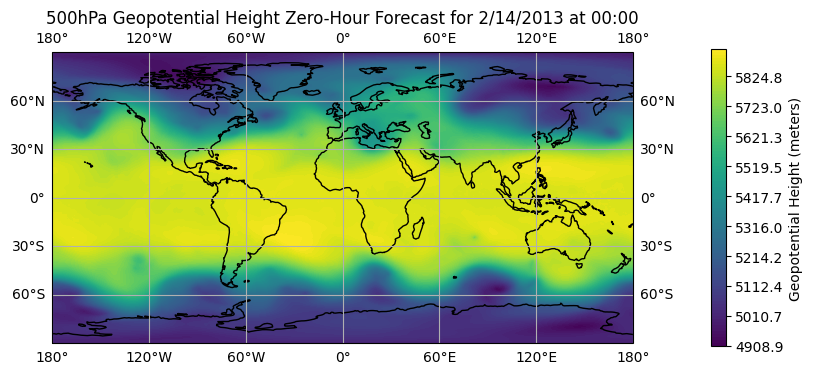

In [ ]:
import pygrib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from joblib import load

def extract_data_and_coords(filename):
    with pygrib.open(filename) as grbs:
        grb = grbs.select()[0]
        data = grb.values
        lats, lons = grb.latlons()
        time = grb.validDate.strftime("%H:%M")
        year = grb.validDate.year
        month = grb.validDate.month
        day = grb.validDate.day
        return data.flatten(), lats, lons, time, year, month, day

# Load the machine learning model
model = load('regr_model.joblib')

# File path of the data to make a prediction on
grib_file = './new-twelve'

# Extract data and coordinates from the file
X_new, lats, lons, time, year, month, day = extract_data_and_coords(grib_file)

# Reshape the input data
X_new = X_new.reshape(-1, 1)

# Make the prediction
prediction = model.predict(X_new).reshape(361, 720)

# Create a plot with a world map using Cartopy
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

# Compute plot min/max and set the contour value range
vmin = prediction.min().item()
vmax = prediction.max().item()
levels = np.linspace(vmin, vmax, 100)

# Plot the geopotential height data
plt.contourf(lons, lats, prediction, levels=levels, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(shrink=0.642, pad=0.1)
cbar.set_label('Geopotential Height (meters)')

# Set plot title and labels
plt.title(f"500hPa Geopotential Height Zero-Hour Forecast for {month}/{day}/{year} at {time}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()



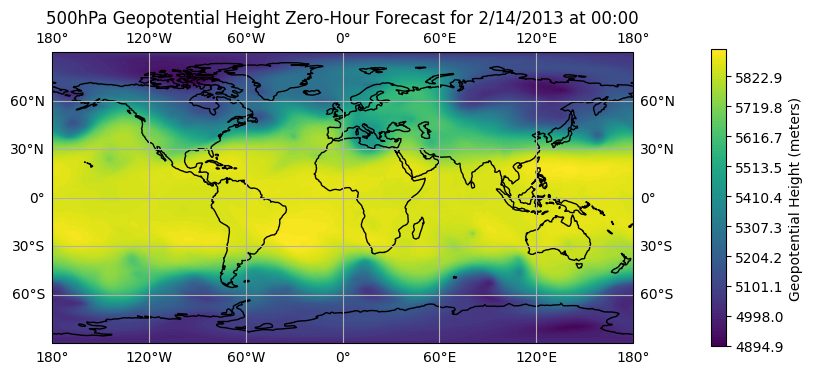

In [ ]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_geopotential_height(grib_file):
    with pygrib.open(grib_file) as grbs:
        grb = grbs.select()[0]
        data = grb.values
        lats, lons = grb.latlons()
        time = grb.validDate.strftime("%H:%M")
        year = grb.validDate.year
        month = grb.validDate.month
        day = grb.validDate.day

    # Create a plot with a world map using Cartopy
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.stock_img()
    ax.gridlines(draw_labels=True)

    # Compute plot min/max and set the contour value range
    vmin = np.min(data)
    vmax = np.max(data)
    levels = np.linspace(vmin, vmax, 100)

    # Plot the geopotential height data
    plt.contourf(lons, lats, data, levels=levels, transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = plt.colorbar(shrink=0.642, pad=0.1)
    cbar.set_label('Geopotential Height (meters)')

    # Set plot title and labels
    plt.title(f"500hPa Geopotential Height Zero-Hour Forecast for {month}/{day}/{year} at {time}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()

# File path of the "new-zero" GRIB file
grib_file = 'new-zero'

# Call the function to plot the geopotential height data
plot_geopotential_height(grib_file)
